In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

In [ ]:
import os
import sys
from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cornac
from cornac.utils import cache
from cornac.datasets import movielens
from cornac.eval_methods import RatioSplit, BaseMethod
from cornac.hyperopt import SearchDomain, Discrete, BaseSearch, GridSearch, RandomSearch
from cornac.models import MF, BPR, WMF, HPF, MMMF, NeuMF
import tensorflow as tf


print(f"System version: {sys.version}")
print(f"Cornac version: {cornac.__version__}")
print(f"Tensorflow version: {tf.__version__}")

SEED = 42
VERBOSE = True

System version: 3.6.13 |Anaconda, Inc.| (default, Mar 16 2021, 11:37:27) [MSC v.1916 64 bit (AMD64)]
Cornac version: 1.6.0
Tensorflow version: 1.15.2


In [ ]:
!pip install --quiet cornac==1.6.0 adjustText
from adjustText import adjust_text

In [ ]:
r = pd.read_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/ratings.csv')  
tr = pd.read_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/to_read.csv')
b = pd.read_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/books.csv')
t = pd.read_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/tags.csv')
bt = pd.read_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/book_tags.csv')
book_genre = pd.read_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/book_genre.csv')

#### Read data and Ratio split

In [ ]:
from cornac.data import Reader

reader = Reader()
rating = reader.read('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/ratings.csv', sep=',', skip_lines=1)

In [ ]:
rs = RatioSplit(
    data=rating,
    test_size = 0.1,
    val_size = 0.1,
    exclude_unknowns=True,
    verbose=VERBOSE,
    seed=SEED,
    rating_threshold = 3
)

rating_threshold = 3.0
exclude_unknowns = True
---
Training data:
Number of users = 53424
Number of items = 10000
Number of ratings = 4781183
Max rating = 5.0
Min rating = 1.0
Global mean = 3.9
---
Test data:
Number of users = 53408
Number of items = 9999
Number of ratings = 597648
Number of unknown users = 0
Number of unknown items = 0
---
Validation data:
Number of users = 53389
Number of items = 9999
Number of ratings = 597648
---
Total users = 53424
Total items = 10000


#### WMF and BPR 

In [ ]:
# hyperparameters grid search
bpr = BPR(verbose=VERBOSE, seed=SEED, name=f"BPR(K={K})")

gs_bpr = GridSearch(
    model=bpr,
    space=[
        Discrete("k", [i for i in range(100, 5000, 50)]),
        Discrete("max_iter", [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]),
        Discrete("lambda_reg", [0.001, 0.01, 0.1, 1]),
        Discrete("learning_rate", [0.01, 0.1, 0.5])
    ],
    metric=cornac.metrics.NCRR(k=10),
    eval_method=rs
)

cornac.Experiment(eval_method=rs, models=[gs_bpr], metrics=eval_metrics, verbose=VERBOSE).run()


[GridSearch_BPR(K=50)] Training started!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 100}


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 200}


  0%|          | 0/200 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 300}


  0%|          | 0/300 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 400}


  0%|          | 0/400 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 500}


  0%|          | 0/500 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 600}


  0%|          | 0/600 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 700}


  0%|          | 0/700 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 800}


  0%|          | 0/800 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 900}


  0%|          | 0/900 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.01, 'max_iter': 1000}


  0%|          | 0/1000 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 100}


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 200}


  0%|          | 0/200 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 300}


  0%|          | 0/300 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 400}


  0%|          | 0/400 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 500}


  0%|          | 0/500 [00:06<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 600}


  0%|          | 0/600 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 700}


  0%|          | 0/700 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 800}


  0%|          | 0/800 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 900}


  0%|          | 0/900 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.1, 'max_iter': 1000}


  0%|          | 0/1000 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 100}


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 200}


  0%|          | 0/200 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 300}


  0%|          | 0/300 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 400}


  0%|          | 0/400 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 500}


  0%|          | 0/500 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 600}


  0%|          | 0/600 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 700}


  0%|          | 0/700 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 800}


  0%|          | 0/800 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 900}


  0%|          | 0/900 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.001, 'learning_rate': 0.5, 'max_iter': 1000}


  0%|          | 0/1000 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 100}


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 200}


  0%|          | 0/200 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 300}


  0%|          | 0/300 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 400}


  0%|          | 0/400 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 500}


  0%|          | 0/500 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 600}


  0%|          | 0/600 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 700}


  0%|          | 0/700 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 800}


  0%|          | 0/800 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 900}


  0%|          | 0/900 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.01, 'max_iter': 1000}


  0%|          | 0/1000 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 100}


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 200}


  0%|          | 0/200 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 300}


  0%|          | 0/300 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 400}


  0%|          | 0/400 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 500}


  0%|          | 0/500 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 600}


  0%|          | 0/600 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 700}


  0%|          | 0/700 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 800}


  0%|          | 0/800 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 900}


  0%|          | 0/900 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.1, 'max_iter': 1000}


  0%|          | 0/1000 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 100}


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 200}


  0%|          | 0/200 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 300}


  0%|          | 0/300 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 400}


  0%|          | 0/400 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 500}


  0%|          | 0/500 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 600}


  0%|          | 0/600 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 700}


  0%|          | 0/700 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 800}


  0%|          | 0/800 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 900}


  0%|          | 0/900 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.01, 'learning_rate': 0.5, 'max_iter': 1000}


  0%|          | 0/1000 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 100}


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 200}


  0%|          | 0/200 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 300}


  0%|          | 0/300 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 400}


  0%|          | 0/400 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 500}


  0%|          | 0/500 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 600}


  0%|          | 0/600 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 700}


  0%|          | 0/700 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 800}


  0%|          | 0/800 [00:00<?, ?it/s]

Optimization finished!
Evaluating: {'k': 100, 'lambda_reg': 0.1, 'learning_rate': 0.01, 'max_iter': 900}


  0%|          | 0/900 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
K=300
wmf = WMF(k=K, max_iter=1000, a=1.0, b=0.01, learning_rate=0.01, lambda_u=0.01, lambda_v=0.01,
              verbose=VERBOSE, seed=SEED, name=f"WMF(K={K})")

eval_metrics = [
      cornac.metrics.RMSE(), 
      cornac.metrics.AUC(),
      cornac.metrics.Precision(k=20),
      cornac.metrics.Recall(k=20),
      cornac.metrics.FMeasure(k=20),
      cornac.metrics.NDCG(k=20),
      cornac.metrics.NCRR(k=20)
    ]

cornac.Experiment(eval_method=rs, models=[wmf], metrics=eval_metrics).run()

In [ ]:
for K in range(100, 10000, 100):
    bpr = BPR(k=K, max_iter=1000, learning_rate=0.01, lambda_reg=0.01, 
                      verbose=VERBOSE, seed=SEED, name=f"BPR(K={K})")

    eval_metrics = [
      cornac.metrics.RMSE(), 
      cornac.metrics.AUC(),
      cornac.metrics.Precision(k=20),
      cornac.metrics.Recall(k=20),
      cornac.metrics.FMeasure(k=20),
      cornac.metrics.NDCG(k=20),
      cornac.metrics.NCRR(k=20)
    ]

    cornac.Experiment(eval_method=rs, models=[bpr], metrics=eval_metrics).run()


[BPR(K=200)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=200)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=200) | 1.7762 | 0.9558 | 0.0630 |  0.0650 |  0.0776 |       0.0489 |    0.0985 | 196.2480

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=200) | 1.7765 | 0.9562 | 0.0629 |  0.0649 |  0.0775 |       0.0488 |    0.0986 |  690.4920 | 178.0175


[BPR(K=300)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=300)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=300) | 1.7792 | 0.9555 | 0.0625 |  0.0645 |  0.0770 |       0.0485 |    0.0976 | 201.3513

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=300) | 1.7797 | 0.9559 | 0.0624 |  0.0647 |  0.0770 |       0.0485 |    0.0976 |  977.0069 | 191.2423


[BPR(K=400)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=400)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=400) | 1.7796 | 0.9553 | 0.0625 |  0.0649 |  0.0773 |       0.0485 |    0.0977 | 250.1765

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=400) | 1.7805 | 0.9557 | 0.0626 |  0.0641 |  0.0768 |       0.0486 |    0.0977 | 1230.6385 | 263.8583


[BPR(K=500)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=500)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=500) | 1.7812 | 0.9551 | 0.0621 |  0.0646 |  0.0768 |       0.0482 |    0.0969 | 233.3540

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=500) | 1.7816 | 0.9555 | 0.0626 |  0.0647 |  0.0772 |       0.0486 |    0.0980 | 1531.9991 | 266.3123


[BPR(K=600)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=600)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=600) | 1.7818 | 0.9550 | 0.0621 |  0.0645 |  0.0767 |       0.0482 |    0.0971 | 253.0505

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=600) | 1.7825 | 0.9554 | 0.0626 |  0.0642 |  0.0769 |       0.0486 |    0.0979 | 1677.8937 | 261.1245


[BPR(K=700)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=700)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=700) | 1.7814 | 0.9549 | 0.0624 |  0.0649 |  0.0771 |       0.0484 |    0.0975 | 237.2017

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=700) | 1.7818 | 0.9554 | 0.0624 |  0.0644 |  0.0769 |       0.0484 |    0.0977 | 1901.4817 | 237.6230


[BPR(K=800)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=800)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=800) | 1.7824 | 0.9548 | 0.0622 |  0.0644 |  0.0767 |       0.0483 |    0.0971 | 262.0378

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=800) | 1.7827 | 0.9553 | 0.0625 |  0.0644 |  0.0769 |       0.0485 |    0.0977 | 2170.7795 | 259.3479


[BPR(K=900)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=900)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=900) | 1.7829 | 0.9547 | 0.0622 |  0.0647 |  0.0769 |       0.0482 |    0.0972 | 280.1589

TEST:
...
           |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
---------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=900) | 1.7835 | 0.9551 | 0.0623 |  0.0644 |  0.0768 |       0.0483 |    0.0975 | 2600.4892 | 274.5567


[BPR(K=1000)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=1000)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=1000) | 1.7834 | 0.9547 | 0.0623 |  0.0648 |  0.0770 |       0.0483 |    0.0972 | 297.5461

TEST:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=1000) | 1.7841 | 0.9551 | 0.0626 |  0.0647 |  0.0771 |       0.0486 |    0.0979 | 2656.9565 | 299.3593


[BPR(K=1100)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=1100)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=1100) | 1.7841 | 0.9545 | 0.0618 |  0.0641 |  0.0763 |       0.0480 |    0.0966 | 288.8419

TEST:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=1100) | 1.7843 | 0.9550 | 0.0620 |  0.0644 |  0.0766 |       0.0481 |    0.0970 | 2906.9847 | 287.2576


[BPR(K=1200)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=1200)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=1200) | 1.7840 | 0.9545 | 0.0623 |  0.0648 |  0.0770 |       0.0483 |    0.0972 | 297.4835

TEST:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=1200) | 1.7846 | 0.9549 | 0.0623 |  0.0640 |  0.0766 |       0.0484 |    0.0975 | 2905.7853 | 312.4053


[BPR(K=1300)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=1300)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=1300) | 1.7843 | 0.9544 | 0.0620 |  0.0642 |  0.0764 |       0.0481 |    0.0967 | 319.5546

TEST:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=1300) | 1.7847 | 0.9548 | 0.0621 |  0.0642 |  0.0765 |       0.0482 |    0.0970 | 3139.6227 | 317.3656


[BPR(K=1400)] Training started!


  0%|          | 0/100 [00:00<?, ?it/s]

Optimization finished!

[BPR(K=1400)] Evaluation started!


Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53408 [00:00<?, ?it/s]

Rating:   0%|          | 0/597648 [00:00<?, ?it/s]

Ranking:   0%|          | 0/53389 [00:00<?, ?it/s]


VALIDATION:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Time (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------
BPR(K=1400) | 1.7843 | 0.9544 | 0.0620 |  0.0644 |  0.0766 |       0.0481 |    0.0969 | 321.8477

TEST:
...
            |   RMSE |    AUC |  F1@20 | NCRR@20 | NDCG@20 | Precision@20 | Recall@20 | Train (s) | Test (s)
----------- + ------ + ------ + ------ + ------- + ------- + ------------ + --------- + --------- + --------
BPR(K=1400) | 1.7848 | 0.9548 | 0.0618 |  0.0638 |  0.0762 |       0.0480 |    0.0966 | 3418.7811 | 321.2503



#### Tag preprocessing

In [ ]:
# create a new dataframe, with column tag name and tag id
tag_df = pd.DataFrame()
tag_df['genre'] = book_genre['genre'].unique()
tag_df['tag_id'] = range(1, book_genre['genre'].nunique()+1)
tag_df.head()

,genre,tag_id
0,fantasy,1
1,young adult,2
2,fiction,3
3,classics,4
4,paranormal,5


In [ ]:
book_tag = pd.merge(book_genre, tag_df, on='genre').sort_values(by=['goodreads_book_id'])

# create a new dataframe, with column user, book and tag id
book_tag_list = pd.DataFrame(book_tag.groupby('goodreads_book_id')['tag_id'].apply(set)).reset_index()

# user, book
user_book = r[['user_id', 'book_id']]
user_book.head()

# book id, goodread id mapping
book_goodread_id = b[['book_id', 'goodreads_book_id']] 

mapping = pd.merge(book_tag_list, book_goodread_id, on='goodreads_book_id')
mapping.set_index('book_id', inplace=True)
mapping.head()

,goodreads_book_id,tag_id
book_id,,
27,1,"{1, 2, 3, 4, 5, 6, 7, 8, 9}"
21,2,"{1, 2, 3, 5, 6, 7, 9}"
2,3,"{1, 2, 3, 4, 5, 6, 8, 9}"
18,5,"{1, 2, 3, 4, 5, 6, 8, 9, 10}"
24,6,"{1, 2, 3, 4, 5, 6, 8, 9}"


#### Prepare item df table for data visualisation

In [ ]:
book_df = b[['book_id', 'authors', 'original_publication_year', 'title', 'language_code']]
book_df.head()
temp = pd.DataFrame()
temp['book_id'] = mapping.index
for i in range(1,len(tag_df)+1):
    temp[i] = 0
temp.set_index('book_id', inplace=True)
temp.head()

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
book_id,,,,,,,,,,,,,,,,,,,,,
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in mapping.index:
    for x in mapping.loc[i]['tag_id']:
        temp.loc[i][x] = 1

In [ ]:
new_df = pd.concat([mapping, temp], axis=1)
new_df = new_df.drop(['tag_id'], axis=1)
with_info = pd.merge(book_df, new_df, on='book_id')
with_info = with_info.drop('goodreads_book_id', axis=1)
with_info.head()

,book_id,authors,original_publication_year,title,language_code,1,2,3,4,5,...,27,28,29,30,31,32,33,34,35,36
0,1,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,1,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
3,4,Harper Lee,1960.0,To Kill a Mockingbird,eng,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tag_name = defaultdict(str)
for i in range(1,len(tag_df)+1):
    tag_name[i] = tag_df.loc[i-1]['genre']
    
with_info.rename(columns=tag_name, inplace=True)
with_info.to_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/book_info_tag.csv')

#### Visualise latent factor

In [ ]:
item_df = pd.read_csv('/content/gdrive/MyDrive/RecSys Project 2/goodbooks-10k-dataset/book_info_tag.csv' )

In [ ]:
item_df.head()

,Unnamed: 0,book_id,authors,original_publication_year,title,language_code,fantasy,young adult,fiction,classics,...,comics,business,psychology,music,chick lit,manga,christian,cookbooks,gay and lesbian,humor and comedy
0,0,1,Suzanne Collins,2008.0,"The Hunger Games (The Hunger Games, #1)",eng,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Sorcerer's Stone (Harry P...,eng,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,3,Stephenie Meyer,2005.0,"Twilight (Twilight, #1)",en-US,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,3,4,Harper Lee,1960.0,To Kill a Mockingbird,eng,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,4,5,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


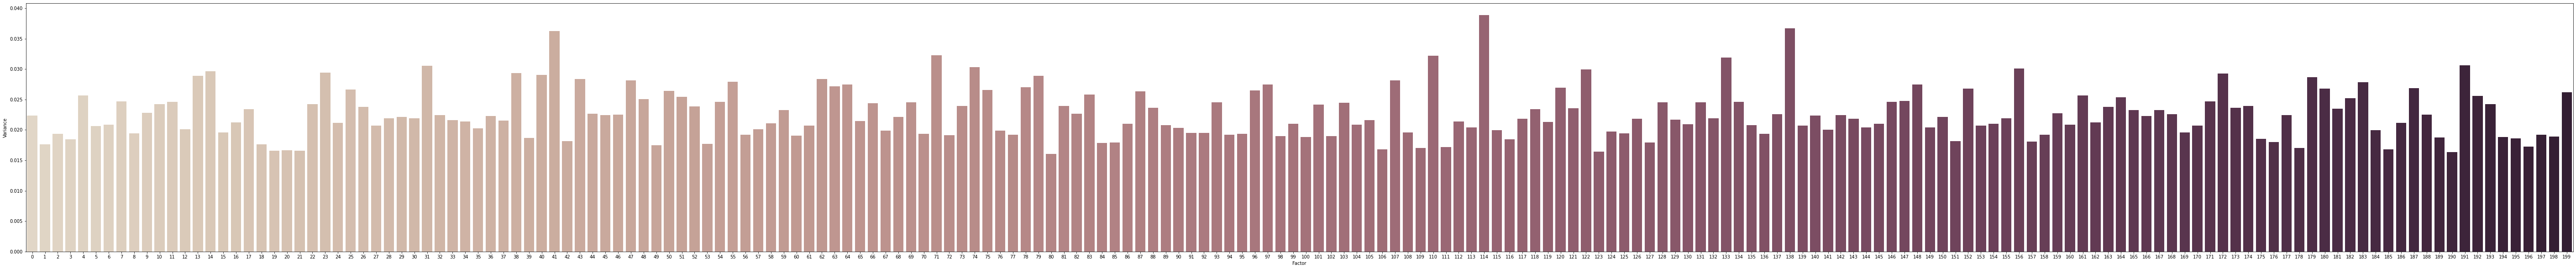

In [ ]:
var_df = pd.DataFrame({"Factor": np.arange(K), "Variance": np.var(bpr.i_factors, axis=0)})
fig, ax = plt.subplots(figsize=(100, 10))
sns.barplot(x="Factor", y="Variance", data=var_df, palette="ch:.25", ax=ax);

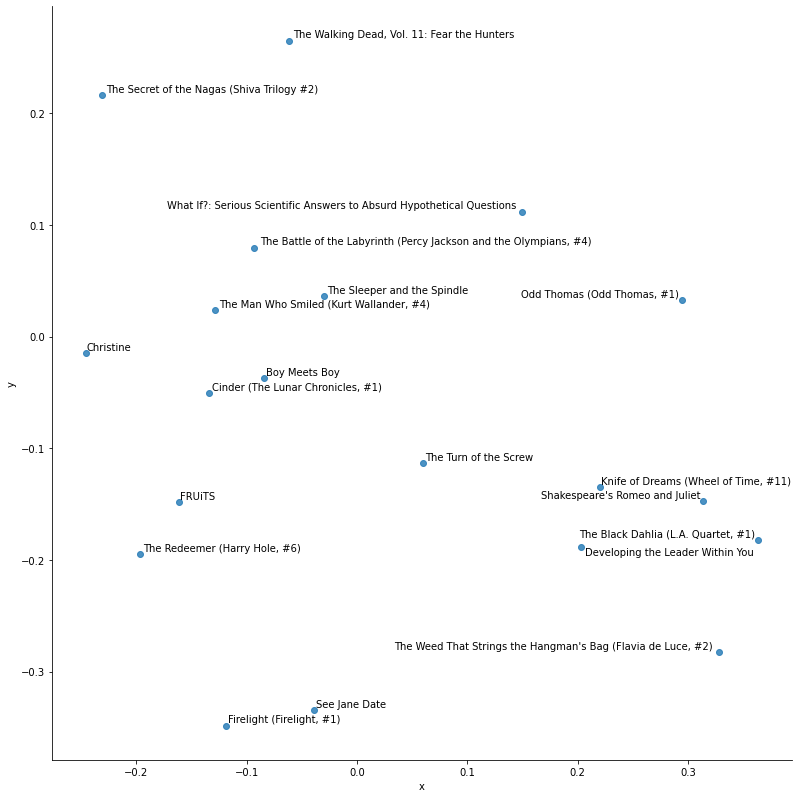

In [ ]:
# title
TOP2F = (114, 138)
SAMPLE_SIZE = 20

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(bpr.i_factors.shape[0]), size=SAMPLE_SIZE, replace=False)-500
sample_df = pd.DataFrame(data=bpr.i_factors[sample_inds][:, TOP2F], columns=["x", "y"])

sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
item_idx2id = list(bpr.train_set.item_ids)
titles = item_df.loc[[int(item_idx2id[i]) for i in sample_inds]]["title"].values
adjust_text(
  [plt.text(*sample_df.loc[i].values, titles[i], size=10) for i in range(len(titles))]
);

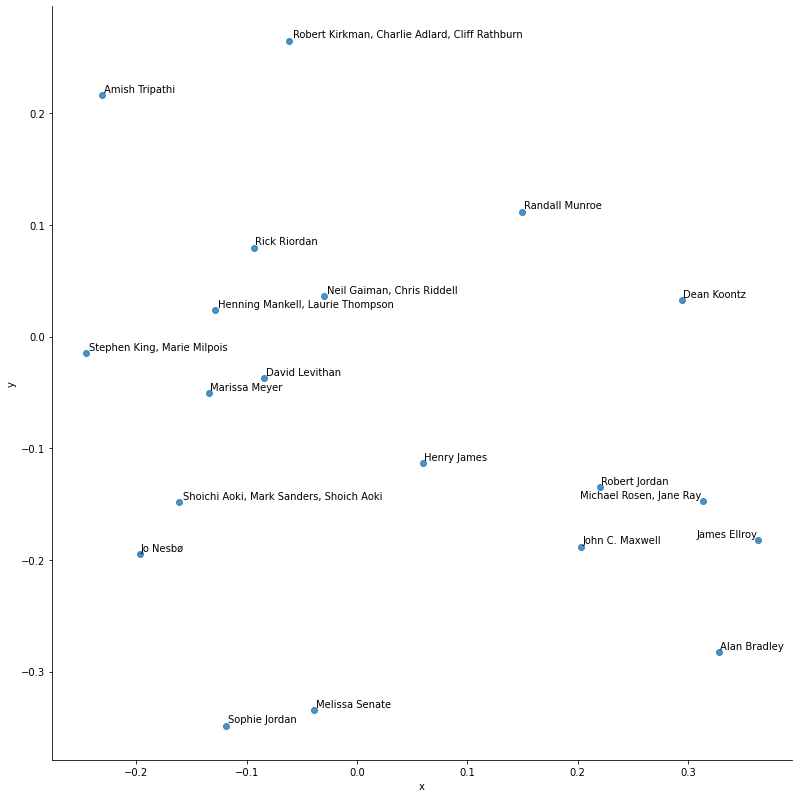

In [ ]:
# author
TOP2F = (114, 138)
SAMPLE_SIZE = 30

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(bpr.i_factors.shape[0]), size=SAMPLE_SIZE, replace=False)+100
sample_df = pd.DataFrame(data=bpr.i_factors[sample_inds][:, TOP2F], columns=["x", "y"])

sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
item_idx2id = list(bpr.train_set.item_ids)
titles = item_df.loc[[int(item_idx2id[i]) for i in sample_inds]]["authors"].values
adjust_text(
  [plt.text(*sample_df.loc[i].values, titles[i], size=10) for i in range(len(titles))]
);

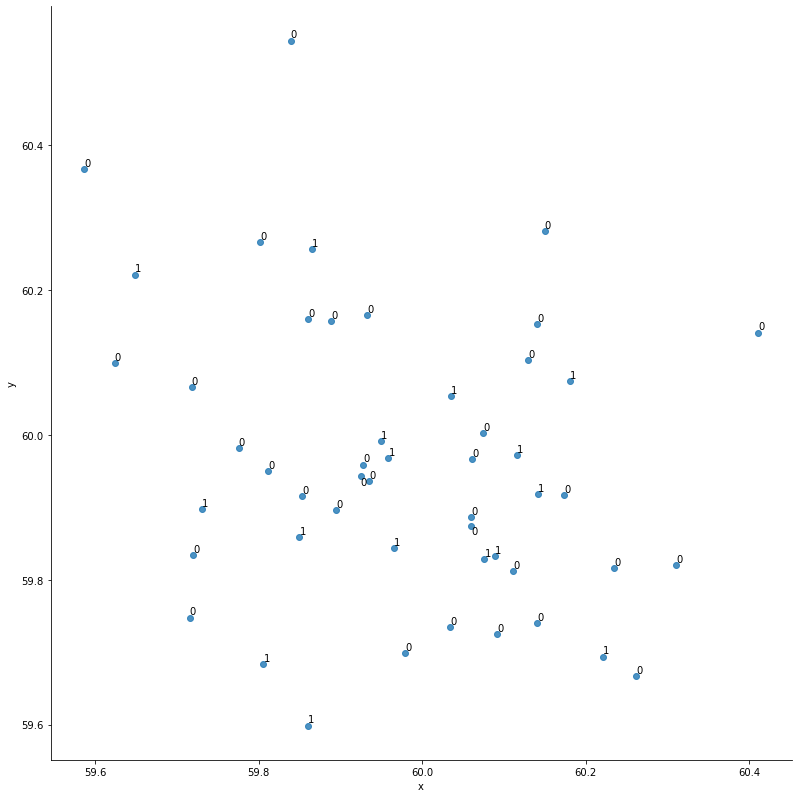

In [ ]:
# genre
TOP2F = (114, 138)
SAMPLE_SIZE = 50

rng = np.random.RandomState(SEED)
sample_inds = rng.choice(np.arange(bpr.i_factors.shape[0]), size=SAMPLE_SIZE, replace=False)
sample_df = pd.DataFrame(data=bpr.i_factors[sample_inds][:, TOP2F], columns=["x", "y"])+60

sns.lmplot(x="x", y="y", data=sample_df, height=11.0, fit_reg=False)
item_idx2id = list(bpr.train_set.item_ids)
titles = item_df.loc[[int(item_idx2id[i]) for i in sample_inds]]["history"].values
adjust_text(
  [plt.text(*sample_df.loc[i].values, titles[i], size=10) for i in range(len(titles))]
);

#### Print out top 20 books by baseline most top

In [ ]:
top20 = [1, 2, 4, 3, 5, 17, 20, 18, 23, 7, 24, 25, 21, 27, 13, 8, 16, 14, 28, 9]
top_df = with_info[with_info['book_id'].isin(top20)][['book_id', 'authors', 'original_publication_year', 'title', 'language_code']]
top_df['rank'] = top_df['book_id'].apply(lambda x: top20.index(x))
top_df = top_df.sort_values('rank')
top_df = top_df.drop('rank', axis=1)
top_df = top_df.reset_index().drop('index', axis=1)
top_df

#### Experiment on libfm, use tag as extra context

In [ ]:
n_users = r.user_id.nunique()
n_books = r.book_id.nunique()
n_tags = tag_df.tag_id.nunique()

In [ ]:
user_id2idx = rs.global_uid_map
book_id2idx = rs.global_iid_map

tag_id2idx = defaultdict()
for name, tagid in tag_df.itertuples(index=False):
    tag_id2idx.setdefault(tagid, len(tag_id2idx))
    
assert len(tag_id2idx) == n_tags

In [ ]:
train_set_df = pd.DataFrame(rs.train_set.uir_tuple[0], columns=['user_id'])
train_set_df['book_id'] = rs.train_set.uir_tuple[1]
train_set_df['rating'] = rs.train_set.uir_tuple[2]

val_set_df = pd.DataFrame(rs.val_set.uir_tuple[0], columns=['user_id'])
val_set_df['book_id'] = rs.val_set.uir_tuple[1]
val_set_df['rating'] = rs.val_set.uir_tuple[2]

test_set_df = pd.DataFrame(rs.test_set.uir_tuple[0], columns=['user_id'])
test_set_df['book_id'] = rs.test_set.uir_tuple[1]
test_set_df['rating'] = rs.test_set.uir_tuple[2]

In [ ]:
def to_fm_sparse_fmt_test(rating, uid, mid, tags):
    # order of features: user, movie, tags
    user_start_idx = 0
    book_start_idx = n_users
    tag_start_idx = book_start_idx + n_books
    return "{} {}:1 {}:1 {}\n".format(
        rating,
        uid,
        mid + book_start_idx, 
        " ".join("{}:1".format(tag_id2idx[t] + tag_start_idx) for t in tags)
  ) 

In [ ]:
# save train data to file
with open("train_v2.libfm", "w") as f:
    for uid, bid, rating in train_set_df.itertuples(index=False):
        f.write(to_fm_sparse_fmt_test(rating, uid, bid, mapping.loc[int(list(book_id2idx.keys())[bid])]['tag_id']))   

# save val data to file
with open("val_v2.libfm", "w") as f:
    for uid, bid, rating in val_set_df.itertuples(index=False):
        f.write(to_fm_sparse_fmt_test(rating, uid, bid, mapping.loc[int(list(book_id2idx.keys())[bid])]['tag_id']))   
        
# save test data to file
with open("test_v2.libfm", "w") as f:
    for uid, bid, rating in test_set_df.itertuples(index=False):
        f.write(to_fm_sparse_fmt_test(rating, uid, bid, mapping.loc[int(list(book_id2idx.keys())[bid])]['tag_id'])) 

In [ ]:
!git clone https://github.com/srendle/libfm.git
!make all -C libfm

In [ ]:
!head train.libfm

In [ ]:
!head test.libfm

In [ ]:
!./libfm/bin/libFM

In [ ]:
!./libfm/bin/libFM -task r -train train_v2.libfm -validation val_v2.libfm -test test_v2.libfm -seed $SEED -dim "1,1,200" -iter 10 -method 'sgda' -regular '0.1,0.1,0.1' -learn_rate 0.01 -out output.csv -save_model model2